# Loan Prediction - Logistic Regression vs Decision Tree (with Graphs)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ------------------------------
# STEP 1: Load the dataset
# ------------------------------
data = pd.read_csv("loan_prediction.csv")
print("Dataset Loaded Successfully!\n")
print(data.head())

# ------------------------------
# STEP 2: Data Preprocessing
# ------------------------------
data.fillna(method='ffill', inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

# ------------------------------
# STEP 3: Split Data
# ------------------------------
X = data.drop(['Loan_Status'], axis=1)
y = data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------
# STEP 4: Train Models
# ------------------------------
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
log_acc = accuracy_score(y_test, log_model.predict(X_test_scaled))

tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)
tree_acc = accuracy_score(y_test, tree_model.predict(X_test))

print(f"\nLogistic Regression Accuracy: {log_acc:.2f}")
print(f"Decision Tree Accuracy: {tree_acc:.2f}")

# ------------------------------
# STEP 5: Choose Best Model
# ------------------------------
best_model = tree_model if tree_acc > log_acc else log_model
print("\n✅ Best Model:", "Decision Tree" if best_model == tree_model else "Logistic Regression")

# ------------------------------
# STEP 6: Evaluate Decision Tree
# ------------------------------
y_pred_tree = tree_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_tree)

print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_tree))

# ------------------------------
# STEP 7: Graphical Representations
# ------------------------------

# 1️⃣ Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2️⃣ Feature Importance Bar Chart
plt.figure(figsize=(8,5))
feature_importance = pd.Series(tree_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', color='teal')
plt.title("Feature Importance in Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# 3️⃣ Decision Tree Visualization
plt.figure(figsize=(16,10))
plot_tree(tree_model, feature_names=X.columns, class_names=["Rejected", "Approved"],
          filled=True, rounded=True, fontsize=9)
plt.title("Decision Tree Structure")
plt.show()

# ------------------------------
# STEP 8: Prediction Example
# ------------------------------
new_applicant = np.array([[1, 1, 0, 1, 0, 6000, 0, 128, 360, 1, 2]])  # Example
prediction = tree_model.predict(new_applicant)
print("\nPredicted Loan Status (1 = Approved, 0 = Rejected):", prediction[0])


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# ------------------------------
# STEP 1: Load the dataset
# ------------------------------
data = pd.read_csv("loan_prediction.csv")
print("Dataset Loaded Successfully!\n")
print(data.head())


Dataset Loaded Successfully!

   Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0    Male     Yes          0      Graduate            No             5849   
1  Female      No          1  Not Graduate           Yes             4583   
2    Male     Yes          0      Graduate            No             3000   
3    Male      No          2      Graduate            No             2583   
4  Female     Yes          0  Not Graduate           Yes             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         128               360               1   
1             1508.0         128               360               1   
2                0.0          66               360               1   
3             2358.0         120               360               1   
4                0.0         141               360               0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           

In [ ]:
# ------------------------------
# STEP 2: Data Preprocessing
# ------------------------------
data.fillna(method='ffill', inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

/tmp/ipython-input-3023950763.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
# ------------------------------
# STEP 3: Split Data
# ------------------------------
X = data.drop(['Loan_Status'], axis=1)
y = data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# ------------------------------
# STEP 4: Train Models
# ------------------------------
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
log_acc = accuracy_score(y_test, log_model.predict(X_test_scaled))

tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)
tree_acc = accuracy_score(y_test, tree_model.predict(X_test))

print(f"\nLogistic Regression Accuracy: {log_acc:.2f}")
print(f"Decision Tree Accuracy: {tree_acc:.2f}")


Logistic Regression Accuracy: 1.00
Decision Tree Accuracy: 0.50


In [ ]:
# ------------------------------
# STEP 5: Choose Best Model
# ------------------------------
best_model = tree_model if tree_acc > log_acc else log_model
print("\n✅ Best Model:", "Decision Tree" if best_model == tree_model else "Logistic Regression")


✅ Best Model: Logistic Regression


In [ ]:
# ------------------------------
# STEP 6: Evaluate Decision Tree
# ------------------------------
y_pred_tree = tree_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_tree)

print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_tree))


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


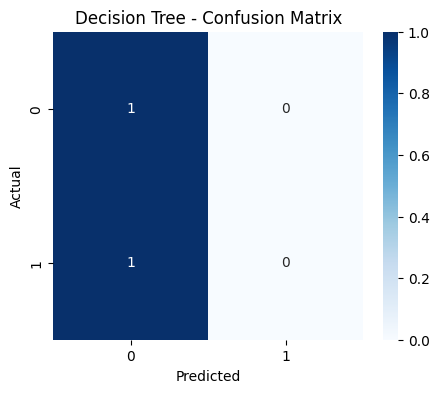

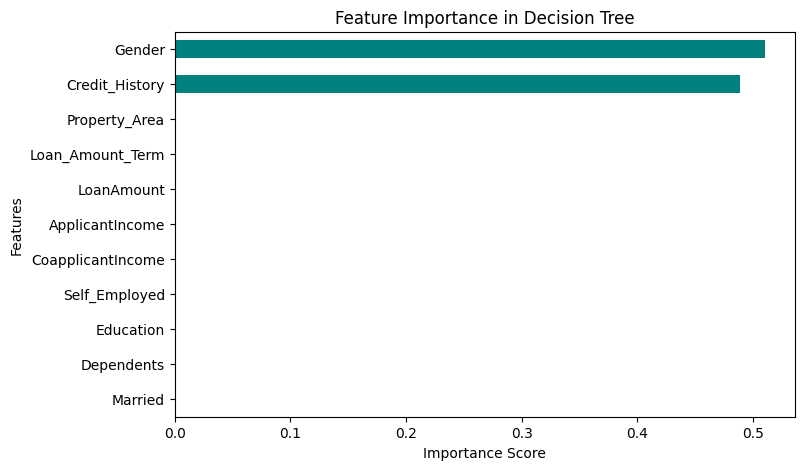

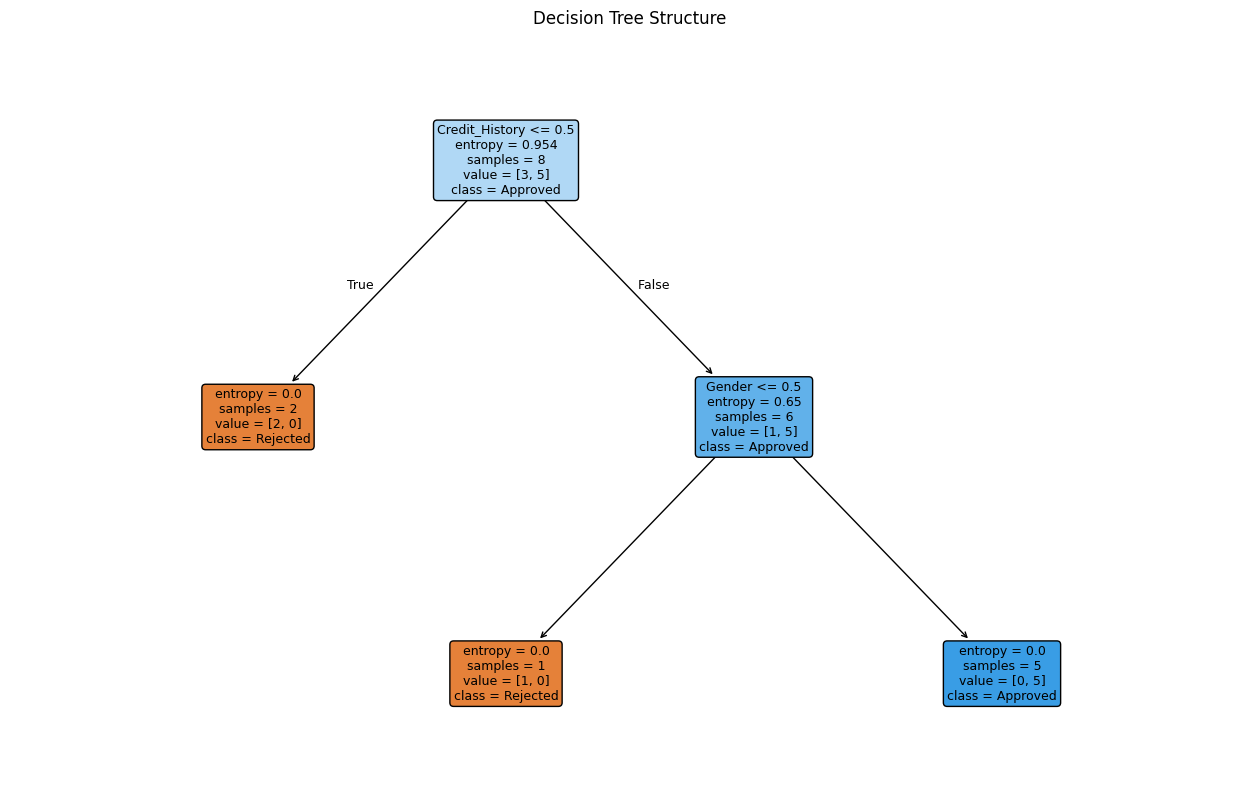

In [ ]:
# ------------------------------
# STEP 7: Graphical Representations
# ------------------------------

# 1️⃣ Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2️⃣ Feature Importance Bar Chart
plt.figure(figsize=(8,5))
feature_importance = pd.Series(tree_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', color='teal')
plt.title("Feature Importance in Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# 3️⃣ Decision Tree Visualization
plt.figure(figsize=(16,10))
plot_tree(tree_model, feature_names=X.columns, class_names=["Rejected", "Approved"],
          filled=True, rounded=True, fontsize=9)
plt.title("Decision Tree Structure")
plt.show()



In [ ]:
# ------------------------------
# STEP 8: Prediction Example
# ------------------------------
new_applicant = np.array([[1, 1, 0, 1, 0, 6000, 0, 128, 360, 1, 2]])  # Example
prediction = tree_model.predict(new_applicant)
print("\nPredicted Loan Status (1 = Approved, 0 = Rejected):", prediction[0])


Predicted Loan Status (1 = Approved, 0 = Rejected): 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Cell `2bcPRW42hnTS`**: This cell trains two different models: Logistic Regression and Decision Tree.
- It initializes a `LogisticRegression` model with a maximum iteration limit and trains it using the scaled training data (`X_train_scaled`, `y_train`). It then calculates and stores the accuracy of the Logistic Regression model on the scaled test data (`X_test_scaled`, `y_test`).
- It initializes a `DecisionTreeClassifier` with 'entropy' as the criterion, a maximum depth of 4, and a fixed random state. It trains the Decision Tree model using the original (unscaled) training data (`X_train`, `y_train`). It then calculates and stores the accuracy of the Decision Tree model on the original test data (`X_test`, `y_test`).
- Finally, it prints the accuracies of both models.

**Cell `zsj5Nuh5hq-f`**: This cell determines the best performing model based on the calculated accuracies. It compares the accuracy of the Decision Tree model (`tree_acc`) and the Logistic Regression model (`log_acc`) and assigns the model with the higher accuracy to the `best_model` variable. It then prints which model was chosen as the best.

**Cell `uITZR5K9h8K9`**: This cell evaluates the performance of the Decision Tree model in more detail.
- It uses the trained `tree_model` to make predictions on the test set (`X_test`).
- It then calculates the confusion matrix (`cm`) based on the actual test labels (`y_test`) and the predicted labels (`y_pred_tree`).
- Finally, it prints a classification report, which includes precision, recall, F1-score, and support for each class.

**Cell `QO8NpIRbh-jA`**: This cell generates graphical representations to visualize the results of the Decision Tree model.
- **Confusion Matrix Heatmap**: It creates a heatmap of the confusion matrix using `seaborn.heatmap` to visually represent the true and predicted counts for each class.
- **Feature Importance Bar Chart**: It creates a horizontal bar chart showing the importance of each feature in the Decision Tree model using `matplotlib.pyplot`. The feature importances are extracted from the `tree_model.feature_importances_` attribute.
- **Decision Tree Visualization**: It generates a visualization of the Decision Tree structure using `sklearn.tree.plot_tree`, showing how the model makes decisions based on the features.

**Cell `3gfZyx-liCry`**: This cell provides an example of how to use the trained Decision Tree model to make a prediction on new, unseen data.
- It creates a NumPy array `new_applicant` representing the features of a hypothetical new loan applicant.
- It then uses the `tree_model.predict()` method to predict the loan status for this new applicant.
- Finally, it prints the predicted loan status (1 for Approved, 0 for Rejected).